# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
> **Gun data**: The gun dataset is our first dataset up for analysis. This dataset should provide us information regarding gun posession and purchase

In [197]:
# Load gun data
gun_df = pd.read_csv('gun_data')
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [198]:
#Determin the type of data in the dataset
gun_df.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [199]:
#Determin the number of rows and columns in the gun data
gun_df.shape

(12485, 27)

In [200]:
#View basic statistics from the gun data
gun_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,10545.000000,10544.000000,5115.000000,2200.000000,2145.000000,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,407.970413,599.332417,1.815249,29.612727,7.557576,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,783.467053,952.144809,4.574641,81.943020,22.097046,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,39.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,561.000000,872.000000,2.000000,16.000000,4.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [55]:
#View baisc information about the gun data dataframe
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

>**Census data**: The census is our second dataset up for analysis. This dataset should provide qualitative information regarding gun possession and purchase.

In [201]:
#Load census data
census_df = pd.read_csv('census_data')
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [124]:
#determin the type of data in the dataset
census_df.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


As predicted, the census is made up of objects and will therefore provide us with contextual information, made to compliment the gun dataset, which is mostly made up of quantitative data (flots and integers)

Elsewhere, we can noe that similar to the gun data, the census provides data on each state. To facilitate the comparative analysis the dataset should be transposed to have the states listed in a column and the facts listed in a row. 

In [242]:
#transpose the census dataset without index
census_data_df = census_df.set_index('Fact').T
census_data_df.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(a),(a),(a),(a),(a),NaN,(b),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(c),(c),(c),(c),(c),(c),NaN,NaN,NaN,NaN,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Includes data not distributed by county.,NaN,NaN,Includes persons reporting only one race,"Hispanics may be of any race, so also are incl...",Economic Census - Puerto Rico data are not com...

In [109]:
#Determin the number of rows and columns in the census data
census_data_df.shape

(51, 85)

In [112]:
#View basic statistics from the census data
census_data_df.describe()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015","Language other than English spoken at home, percent of persons age 5 years+, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","In civilian labor force, total, percent of population age 16 years+, 2011-2015","In civilian labor force, female, percent of population age 16 years+, 2011-2015","Total accommodation and food services sales, 2012 ($1,000)","Total health care and social assistance receipts/revenue, 2012 ($1,000)","Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
count,50,50,50,50,50,50,50,50,50,50,50,50,51,51,51,51,51,50,51,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,51,51,51,51,51,51,50,50,50,50,51,51,51,51,50,50,50,50,50,50,50,50,50,50,50,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1
unique,50,50,45,50,29,29,43,40,39,40,27,28,48,47,31,43,13,30,48,49,50,45,50,50,43,49,50,50,48,50,50,31,44,49,45,50,38,47,45,48,51,51,50,51,51,51,39,50,50,44,51,51,51,38,50,50,50,50,50,50,50,50,49,50,50,0,0,0,0,1,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1
top,"4,863,300","4,780,131",1.70%,"4,779,736",6.40%,7.10%,22.80%,25.50%,16.10%,13.80%,50.30%,50.40%,79.40%,1.30%,0.50%,2.50%,0.10%,1.90%,5.00%

In [111]:
#View baisc information about the census data dataframe
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [439]:
#Narrow the dataset to include only facts of interest
census_data_subset_df = census_data_df[['Owner-occupied housing unit rate, 2011-2015',
                                      'Median value of owner-occupied housing units, 2011-2015',
                              'Median selected monthly owner costs -with a mortgage, 2011-2015',
                           'Median selected monthly owner costs -without a mortgage, 2011-2015',
                                                                 'Median gross rent, 2011-2015',
                                                                       'Building permits, 2016',
                                                                        'Households, 2011-2015',
                                                             'Persons per household, 2011-2015',
                                         'Median household income (in 2015 dollars), 2011-2015',
                             'Per capita income in past 12 months (in 2015 dollars), 2011-2015',
                                                                  'Persons in poverty, percent',
                                                          'Total employer establishments, 2015',
                                                                       'Total employment, 2015',
                                                          'Total annual payroll, 2015 ($1,000)',
                                                  'Total employment, percent change, 2014-2015',]]
census_data_subset_df.head()

Fact,"Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.,Includes data not distributed by county.
Alabama,68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%
Alaska,63.40%,"$250,000","$1,827",$554,"$1,146","1,503","250,969",2.81,"$72,515","$33,413",9.90%,"20,907","267,999","15,643,303",0.40%
Arizona,62.80%,"$167,500","$1,343",$380,$913,"35,578","2,412,212",2.69,"$50,255","$25,848",16.40%,"136,352","2,295,186","102,671,393",2.40%
Arkansas,66.10%,"$111,400","$1,019",$327,$677,"9,474","1,138,025",2.53,"$41,371","$22,798",17.20%,"65,175","1,003,113","39,451,191",1.10%


In [440]:
#drop unecessary row
census_subset_df = census_data_subset_df.drop('Fact Note')
census_subset_df.head()

Fact,"Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
Alabama,68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%
Alaska,63.40%,"$250,000","$1,827",$554,"$1,146","1,503","250,969",2.81,"$72,515","$33,413",9.90%,"20,907","267,999","15,643,303",0.40%
Arizona,62.80%,"$167,500","$1,343",$380,$913,"35,578","2,412,212",2.69,"$50,255","$25,848",16.40%,"136,352","2,295,186","102,671,393",2.40%
Arkansas,66.10%,"$111,400","$1,019",$327,$677,"9,474","1,138,025",2.53,"$41,371","$22,798",17.20%,"65,175","1,003,113","39,451,191",1.10%
California,54.30%,"$385,500","$2,155",$500,"$1,255","102,350","12,717,801",2.96,"$61,818","$30,318",14.30%,"908,120","14,325,377","856,954,246",3.50%


To ensure sufficient depth in the analysis, we would want to combine the census date with with gun data. To do this there needs to be a communly recognized column such as State. It is therefore important that the column containing the state names is approprietly titled

In [441]:
#include column title for 'state'
census_subset_df.index.name = 'state'
census_subset_df.head()

Fact,"Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
state,,,,,,,,,,,,,,,
Alabama,68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%
Alaska,63.40%,"$250,000","$1,827",$554,"$1,146","1,503","250,969",2.81,"$72,515","$33,413",9.90%,"20,907","267,999","15,643,303",0.40%
Arizona,62.80%,"$167,500","$1,343",$380,$913,"35,578","2,412,212",2.69,"$50,255","$25,848",16.40%,"136,352","2,295,186","102,671,393",2.40%
Arkansas,66.10%,"$111,400","$1,019",$327,$677,"9,474","1,138,025",2.53,"$41,371","$22,798",17.20%,"65,175","1,003,113","39,451,191",1.10%
California,54.30%,"$385,500","$2,155",$500,"$1,255","102,350","12,717,801",2.96,"$61,818","$30,318",14.30%,"908,120","14,325,377","856,954,246",3.50%


After transposing the dataset, it seems the the index was transposed as well and are acting as titles but not recognizeed as column titles. 

In [442]:
#define the index
census_subset_df.reset_index(inplace=True)
census_subset_df.head()

Fact,state,"Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%
1,Alaska,63.40%,"$250,000","$1,827",$554,"$1,146","1,503","250,969",2.81,"$72,515","$33,413",9.90%,"20,907","267,999","15,643,303",0.40%
2,Arizona,62.80%,"$167,500","$1,343",$380,$913,"35,578","2,412,212",2.69,"$50,255","$25,848",16.40%,"136,352","2,295,186","102,671,393",2.40%
3,Arkansas,66.10%,"$111,400","$1,019",$327,$677,"9,474","1,138,025",2.53,"$41,371","$22,798",17.20%,"65,175","1,003,113","39,451,191",1.10%
4,California,54.30%,"$385,500","$2,155",$500,"$1,255","102,350","12,717,801",2.96,"$61,818","$30,318",14.30%,"908,120","14,325,377","856,954,246",3.50%


In [443]:
#eliminate unecessary symbols
census_subset_df['Owner-occupied housing unit rate, 2011-2015'] = census_subset_df['Owner-occupied housing unit rate, 2011-2015'].str.strip('%')
census_subset_df['Persons in poverty, percent'] = census_subset_df['Persons in poverty, percent'].str.strip('% ')
census_subset_df['Median value of owner-occupied housing units, 2011-2015'] = census_subset_df['Median value of owner-occupied housing units, 2011-2015'].str.strip('$')
census_subset_df['Median selected monthly owner costs -with a mortgage, 2011-2015'] = census_subset_df['Median selected monthly owner costs -with a mortgage, 2011-2015'].str.strip('$')
census_subset_df['Median selected monthly owner costs -without a mortgage, 2011-2015'] = census_subset_df['Median selected monthly owner costs -without a mortgage, 2011-2015'].str.strip('$')
census_subset_df['Median gross rent, 2011-2015'] = census_subset_df['Median gross rent, 2011-2015'].str.strip('$')
census_subset_df['Median household income (in 2015 dollars), 2011-2015'] = census_subset_df['Median household income (in 2015 dollars), 2011-2015'].str.strip('$')
census_subset_df['Per capita income in past 12 months (in 2015 dollars), 2011-2015'] = census_subset_df['Per capita income in past 12 months (in 2015 dollars), 2011-2015'].str.strip('$')

census_subset_df.head()

Fact,state,"Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,Alabama,68.70,"125,500","1,139",345,717,"15,001","1,848,325",2.55,"43,623","24,091",17.10,"98,540","1,634,391","67,370,353",1.90%
1,Alaska,63.40,"250,000","1,827",554,"1,146","1,503","250,969",2.81,"72,515","33,413",9.90,"20,907","267,999","15,643,303",0.40%
2,Arizona,62.80,"167,500","1,343",380,913,"35,578","2,412,212",2.69,"50,255","25,848",16.40,"136,352","2,295,186","102,671,393",2.40%
3,Arkansas,66.10,"111,400","1,019",327,677,"9,474","1,138,025",2.53,"41,371","22,798",17.20,"65,175","1,003,113","39,451,191",1.10%
4,California,54.30,"385,500","2,155",500,"1,255","102,350","12,717,801",2.96,"61,818","30,318",14.30,"908,120","14,325,377","856,954,246",3.50%


In [444]:
#check for nulls
census_subset_df.isnull().values.any()

False

In [445]:
census_subset_df['Owner-occupied housing unit rate, 2011-2015'] = census_subset_df['Owner-occupied housing unit rate, 2011-2015'].astype(float)
census_subset_df['Median selected monthly owner costs -with a mortgage, 2011-2015'] = census_subset_df['Median selected monthly owner costs -with a mortgage, 2011-2015'].astype(int)

ValueError: invalid literal for int() with base 10: '1,139 '

In [446]:
census_subset_df['Owner-occupied housing unit rate, 2011-2015'] = census_subset_df['Owner-occupied housing unit rate, 2011-2015'].astype(float)
census_subset_df['Median value of owner-occupied housing units, 2011-2015'] = census_subset_df['Median value of owner-occupied housing units, 2011-2015'].astype(int)
census_subset_df['Median selected monthly owner costs -with a mortgage, 2011-2015'] = census_subset_df['Median selected monthly owner costs -with a mortgage, 2011-2015'].astype(int)

census_subset_df['Median selected monthly owner costs -without a mortgage, 2011-2015'] = census_subset_df['Median selected monthly owner costs -without a mortgage, 2011-2015'].astype(int)
census_subset_df['Owner-occupied housing unit rate, 2011-2015'] = census_subset_df['Owner-occupied housing unit rate, 2011-2015'].astype(int)
census_subset_df['Median gross rent, 2011-2015'] = census_subset_df['Median gross rent, 2011-2015'].astype(int)
census_subset_df['Building permits, 2016'] = census_subset_df['Building permits, 2016'].astype(int)
census_subset_df['Households, 2011-2015'] = census_subset_df['Households, 2011-2015'].astype(int)
census_subset_df['Persons per household, 2011-2015'] = census_subset_df['Persons per household, 2011-2015'].astype(float)
census_subset_df['Median household income (in 2015 dollars), 2011-2015'] = census_subset_df['Median household income (in 2015 dollars), 2011-2015'].astype(int)
census_subset_df['Per capita income in past 12 months (in 2015 dollars), 2011-2015'] = census_subset_df['Per capita income in past 12 months (in 2015 dollars), 2011-2015'].astype(int)
census_subset_df['Persons in poverty, percent'] = census_subset_df['Persons in poverty, percent'].astype(float)
census_subset_df['Total employer establishments, 2015'] = census_subset_df['Total employer establishments, 2015'].astype(int)
census_subset_df['Total employment, 2015'] = census_subset_df['Total employment, 2015'].astype(int)
census_subset_df['Total annual payroll, 2015 ($1,000)'] = census_subset_df['Total annual payroll, 2015 ($1,000)'].astype(int)
census_subset_df['Total employment, percent change, 2014-2015'] = census_subset_df['Total employment, percent change, 2014-2015'].astype(int)

ValueError: invalid literal for int() with base 10: '125,500 '

In [447]:
census_subset_df.dtypes

Fact
state                                                                  object
Owner-occupied housing unit rate, 2011-2015                           float64
Median value of owner-occupied housing units, 2011-2015                object
Median selected monthly owner costs -with a mortgage, 2011-2015        object
Median selected monthly owner costs -without a mortgage, 2011-2015     object
Median gross rent, 2011-2015                                           object
Building permits, 2016                                                 object
Households, 2011-2015                                                  object
Persons per household, 2011-2015                                       object
Median household income (in 2015 dollars), 2011-2015                   object
Per capita income in past 12 months (in 2015 dollars), 2011-2015       object
Persons in poverty, percent                                            object
Total employer establishments, 2015                        

The facts chosen for analysis in the census data were all collected in 2015. As such the gun data must also be filtered and narrowed to only report data from 2015. 

In [389]:
#filter for the 2015
gun_data_df = gun_df[gun_df["month"].str.contains('2015')]
gun_data_df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1155,2015-12,Alabama,31359.0,NaN,47605.0,33710.0,1698.0,1752,0.0,18.0,15.0,0.0,2579.0,2136.0,10.0,0.0,0.0,0.0,NaN,NaN,12.0,14.0,4.0,2.0,0.0,0.0,120914
1156,2015-12,Alaska,245.0,NaN,5265.0,4638.0,356.0,214,0.0,5.0,7.0,0.0,150.0,140.0,3.0,18.0,10.0,0.0,NaN,NaN,1.0,3.0,0.0,0.0,0.0,0.0,11055
1157,2015-12,Arizona,2940.0,NaN,25562.0,14725.0,1327.0,995,0.0,6.0,3.0,1.0,1384.0,725.0,3.0,73.0,3.0,1.0,NaN,NaN,6.0,2.0,2.0,1.0,0.0,0.0,47759
1158,2015-12,Arkansas,4076.0,NaN,13780.0,15241.0,365.0,521,0.0,8.0,13.0,0.0,1109.0,1755.0,1.0,0.0,0.0,0.0,NaN,NaN,9.0,7.0,1.0,0.0,0.0,0.0,36886
1159,2015-12,California,119166.0,NaN,74399.0,48762.0,9583.0,0,0.0,0.0,0.0,0.0,580.0,451.0,5.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,252946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,2015-01,Virginia,379.0,NaN,21023.0,14433.0,844.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,36685
1811,2015-01,Washington,10516.0,NaN,13781.0,9419.0,1423.0,473,5.0,2.0,2.0,0.0,1246.0,1149.0,2.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,38018
1812,2015-01,West Virginia,1450.0,NaN,6881.0,5876.0,289.0,406,15.0,1.0,2.0,0.0,1032.0,1669.0,3.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,17624
1813,2015-01,Wisconsin,4614.0,NaN,9703.0,9221.0,608.0,49,0.0,0.0,1.0,0.0,123.0,263.0,5.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,24587


In [390]:
#Check for duplicates
gun_data_df.duplicated().values.any()

False

In [391]:
#Check for nulls
gun_data_df.isnull().values.any()

True

In [392]:
#Eliminate all columns containing only null values
gun_data_subset_df = gun_data_df.drop(['permit_recheck','rentals_handgun','rentals_long_gun'], axis=1)
gun_data_subset_df

,month,state,permit,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1155,2015-12,Alabama,31359.0,47605.0,33710.0,1698.0,1752,0.0,18.0,15.0,0.0,2579.0,2136.0,10.0,0.0,0.0,0.0,12.0,14.0,4.0,2.0,0.0,0.0,120914
1156,2015-12,Alaska,245.0,5265.0,4638.0,356.0,214,0.0,5.0,7.0,0.0,150.0,140.0,3.0,18.0,10.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,11055
1157,2015-12,Arizona,2940.0,25562.0,14725.0,1327.0,995,0.0,6.0,3.0,1.0,1384.0,725.0,3.0,73.0,3.0,1.0,6.0,2.0,2.0,1.0,0.0,0.0,47759
1158,2015-12,Arkansas,4076.0,13780.0,15241.0,365.0,521,0.0,8.0,13.0,0.0,1109.0,1755.0,1.0,0.0,0.0,0.0,9.0,7.0,1.0,0.0,0.0,0.0,36886
1159,2015-12,California,119166.0,74399.0,48762.0,9583.0,0,0.0,0.0,0.0,0.0,580.0,451.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,2015-01,Virginia,379.0,21023.0,14433.0,844.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36685
1811,2015-01,Washington,10516.0,13781.0,9419.0,1423.0,473,5.0,2.0,2.0,0.0,1246.0,1149.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38018
1812,2015-01,West Virginia,1450.0,6881.0,5876.0,289.0,406,15.0,1.0,2.0,0.0,1032.0,1669.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17624
1813,2015-01,Wisconsin,4614.0,9703.0,9221.0,608.0,49,0.0,0.0,1.0,0.0,123.0,263.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24587


In [393]:
#Replace null value with the mean
mean = gun_data_subset_df['return_to_seller_other'].mean()
gun_data_subset_df['return_to_seller_other'].fillna(mean, inplace = True)
gun_data_subset_df

,month,state,permit,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1155,2015-12,Alabama,31359.0,47605.0,33710.0,1698.0,1752,0.0,18.0,15.0,0.0,2579.0,2136.0,10.0,0.0,0.0,0.0,12.0,14.0,4.0,2.0,0.0,0.0,120914
1156,2015-12,Alaska,245.0,5265.0,4638.0,356.0,214,0.0,5.0,7.0,0.0,150.0,140.0,3.0,18.0,10.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,11055
1157,2015-12,Arizona,2940.0,25562.0,14725.0,1327.0,995,0.0,6.0,3.0,1.0,1384.0,725.0,3.0,73.0,3.0,1.0,6.0,2.0,2.0,1.0,0.0,0.0,47759
1158,2015-12,Arkansas,4076.0,13780.0,15241.0,365.0,521,0.0,8.0,13.0,0.0,1109.0,1755.0,1.0,0.0,0.0,0.0,9.0,7.0,1.0,0.0,0.0,0.0,36886
1159,2015-12,California,119166.0,74399.0,48762.0,9583.0,0,0.0,0.0,0.0,0.0,580.0,451.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,2015-01,Virginia,379.0,21023.0,14433.0,844.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,36685
1811,2015-01,Washington,10516.0,13781.0,9419.0,1423.0,473,5.0,2.0,2.0,0.0,1246.0,1149.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38018
1812,2015-01,West Virginia,1450.0,6881.0,5876.0,289.0,406,15.0,1.0,2.0,0.0,1032.0,1669.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17624
1813,2015-01,Wisconsin,4614.0,9703.0,9221.0,608.0,49,0.0,0.0,1.0,0.0,123.0,263.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24587


In [394]:
#Final check for nulls
gun_data_subset_df.isnull().values.any()

False

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

Having narrowed our dataset the, the statistics pulled at the beginning of the analysis will no longer be accurate to our new dataframe. I will therefore want to look at the new statistics as I seek better understand our new dataframe. 

In [395]:
#View updated basic list of statistics
gun_data_subset_df.describe()

,permit,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.00000,660.000000,660.000000
mean,13306.133333,11111.830303,8302.183333,499.240909,367.234848,10.662121,3.578788,3.834848,0.265152,598.715152,628.903030,2.290909,24.715152,6.948485,0.615152,10.880303,8.793939,0.715152,0.283333,0.45303,0.045455,34888.315152
std,35772.494220,13629.615616,8589.742602,830.199587,521.681149,94.897946,6.995436,6.442579,1.487734,1046.217256,937.058865,4.661883,74.079833,23.106281,2.164077,49.218899,38.458538,3.707935,0.997734,1.61534,0.212877,47663.699629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,491.750000,2150.250000,2564.250000,58.000000,8.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,7227.500000
50%,2940.000000,6774.000000,5851.000000,201.500000,174.500000,0.000000,0.500000,1.000000,0.000000,114.500000,212.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,20626.500000
75%,11826.750000,15023.750000,11573.500000,607.250000,512.250000,0.000000,4.000000,5.000000,0.000000,999.250000,954.000000,3.000000,7.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,41810.500000
max,298959.000000,107224.000000,80247.000000,9583.000000,4505.000000,2113.000000,47.000000,38.000000,32.000000,8969.000000,7521.000000,36.000000,474.000000,159.000000,23.000000,497.000000,408.000000,71.000000,10.000000,17.00000,2.000000,320778.000000


In [396]:
df = gun_data_subset_df.merge(census_subset_df, how='left', on='state')
df.head()

,month,state,permit,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,"Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, 2011-2015","Median selected monthly owner costs -with a mortgage, 2011-2015","Median selected monthly owner costs -without a mortgage, 2011-2015","Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015"
0,2015-12,Alabama,31359.0,47605.0,33710.0,1698.0,1752,0.0,18.0,15.0,0.0,2579.0,2136.0,10.0,0.0,0.0,0.0,12.0,14.0,4.0,2.0,0.0,0.0,120914,68.70,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,"$43,623","$24,091",17.10,"98,540","1,634,391","67,370,353",1.90%
1,2015-12,Alaska,245.0,5265.0,4638.0,356.0,214,0.0,5.0,7.0,0.0,150.0,140.0,3.0,18.0,10.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,11055,63.40,"$250,000","$1,827",$554,"$1,146","1,503","250,969",2.81,"$72,515","$33,413",9.90,"20,907","267,999","15,643,303",0.40%
2,2015-12,Arizona,2940.0,25562.0,14725.0,1327.0,995,0.0,6.0,3.0,1.0,1384.0,725.0,3.0,73.0,3.0,1.0,6.0,2.0,2.0,1.0,0.0,0.0,47759,62.80,"$167,500","$1,343",$380,$913,"35,578","2,412,212",2.69,"$50,255","$25,848",16.40,"136,352","2,295,186","102,671,393",2.40%
3,2015-12,Arkansas,4076.0,13780.0,15241.0,365.0,521,0.0,8.0,13.0,0.0,1109.0,1755.0,1.0,0.0,0.0,0.0,9.0,7.0,1.0,0.0,0.0,0.0,36886,66.10,"$111,400","$1,019",$327,$677,"9,474","1,138,025",2.53,"$41,371","$22,798",17.20,"65,175","1,003,113","39,451,191",1.10%
4,2015-12,California,119166.0,74399.0,48762.0,9583.0,0,0.0,0.0,0.0,0.0,580.0,451.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,252946,54.30,"$385,500","$2,155",$500,"$1,255","102,350","12,717,801",2.96,"$61,818","$30,318",14.30,"908,120","14,325,377","856,954,246",3.50%


In [397]:
df.dtypes

month                                                                  object
state                                                                  object
permit                                                                float64
handgun                                                               float64
long_gun                                                              float64
other                                                                 float64
multiple                                                                int64
admin                                                                 float64
prepawn_handgun                                                       float64
prepawn_long_gun                                                      float64
prepawn_other                                                         float64
redemption_handgun                                                    float64
redemption_long_gun                                             

TypeError: 'value' must be an instance of str or bytes, not a float

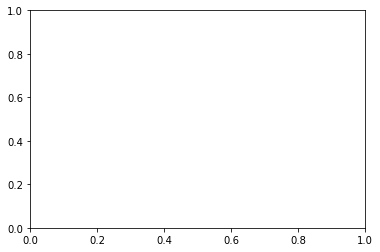

In [398]:
df.plot(x="totals", y="Persons per household, 2011-2015", kind="scatter")

In [399]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.


In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
# questions. Add more headers as needed if you have more questions to
# investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!